In [ ]:
#importing and downloading nltk
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all
       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package brown to /root/nltk_data...
       |   Unzipping corpora/brown.zip.
       | Downloading package brown_tei to /root/nltk_data...
       |   Unzipping corpora/brown_tei.zip.
       | Downloading package cess_cat to /root/nltk_data...
       |   Unzipping corpora/cess_cat.zip.
       | Downloading package cess_esp to /root/nltk_data...
 

True

In [ ]:
#reading the overall speech data
data=open("projectdata.txt").read()
data

'Thank you. Thank you. Thank you to Vice President Pence. He\'s a good guy. We\'ve done a great job together. And Merry Christmas, Michigan. Thank you, Michigan. What a victory we had in Michigan. What a victory was that. One of the greats. Was that the greatest evening? But I\'m thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God. Thank you very much. And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas. I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky. I took you on this fantastic journey. It\'s so much fun. They want to impeach you. They want to do worse than that." By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached. The country is doing better than ever before. We did nothing wrong. We did nothing wrong. And we have tremendo

In [ ]:
#loading the data into a corpus and reading it. corpus gives us the opportunity to explore the raw text data in more details
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
import os
corpus = PlaintextCorpusReader(os.getcwd(), "projectdata.txt")
print (corpus.raw())


Thank you. Thank you. Thank you to Vice President Pence. He's a good guy. We've done a great job together. And Merry Christmas, Michigan. Thank you, Michigan. What a victory we had in Michigan. What a victory was that. One of the greats. Was that the greatest evening? But I'm thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God. Thank you very much. And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas. I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky. I took you on this fantastic journey. It's so much fun. They want to impeach you. They want to do worse than that." By the way, by the way, by the way, it doesn't really feel like we're being impeached. The country is doing better than ever before. We did nothing wrong. We did nothing wrong. And we have tremendous supp

In [ ]:
sentences=corpus.sents()
print(len(sentences))

36789


In [ ]:
word_indata= corpus.words()
print(len(word_indata))

471093


Word clouds


This a visual display of words in a corpus. The size of the words is based on how many times the word occured in the corpus. The more frequent the bigger it is in the word cloud. In creating the word clouds, stopwords will be removed, because we do not want the wordclouds flooded with stopwords.

In [ ]:
#printing word clouds. setting stopwords to the standard.
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS
stopwords = set (STOPWORDS)

#creating the wordclouds and passing in the data
wordcloud=WordCloud(stopwords=stopwords, max_words=100, \
                    background_color="white").generate(data)

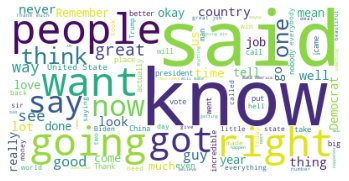

In [ ]:
#displaying the wordcloud using matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


**Sentiment Analysis**


The next stage is to identify sentiments in the data. This will be done by categorizing intent or opinion in the text data. The method that will be used here is the bag of words technique. Bag of words finds specific words in the data and use these words to determine centiments. Polarity will be used to determine the centiments. It considers whether the words are positive, negative or neutral. Polarity ranges from +1 (positive) to -1(negative), with neutral being 0. It also identifies subjectiveness of sentiments, based on how it is used. objective is 0 while subjective is 1.  The package that we would be using is textblob. Textblob allows us to perform sentiment analysis on the data. 

In [ ]:
!pip install textblob
from textblob import TextBlob

In [ ]:
#getting the overall sentiments of the  all the speech data for all location
sentanaly=TextBlob(data)
print (sentanaly.sentiment)


Sentiment(polarity=0.16889071726816188, subjectivity=0.5195487375227866)


**Preparing data for individual sentence sentiment analysis**


Based on the sentiment output above, it is evident that python currently, python sees the data as a single string, which is why we got a sentiment score for the overall data. Keeping in mind that the objective of this project is to develop a machine learning (ML) model, it is important that we are able to determine the sentiments for each individual sentences. Therefore, we will now proceed to split the data into individual sentences. This will lead to another challenge because the sentiment analysis tool (textblob) that will be used cannot work with list, it only works with string. To solve this problem, the output data will be saved into a text file, which will then be read and used to find sentiments in each of the sentences. 

In [ ]:
#before we go on to find sentiment in the data. we need to structure the data and turn it to a list of sentences. 
newdata= data.split('.')
newdata

['Thank you',
 ' Thank you',
 ' Thank you to Vice President Pence',
 " He's a good guy",
 " We've done a great job together",
 ' And Merry Christmas, Michigan',
 ' Thank you, Michigan',
 ' What a victory we had in Michigan',
 ' What a victory was that',
 ' One of the greats',
 " Was that the greatest evening? But I'm thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God",
 ' Thank you very much',
 ' And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas',
 ' I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky',
 ' I took you on this fantastic journey',
 " It's so much fun",
 ' They want to impeach you',
 ' They want to do worse than that',
 '" By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached',
 ' The country is doing better than ever

In [ ]:
#saving the listed sentences to a file
outF = open("myOutFile.txt", "w")
for line in newdata:
  # write line to output file
  outF.write(line)
  outF.write("\n")
outF.close()
outF

<_io.TextIOWrapper name='myOutFile.txt' mode='w' encoding='UTF-8'>

In [ ]:
#reading in the list file data

with open("myOutFile.txt", 'r') as sd:  
    Sdata = sd.readlines()
print(Sdata)


['Thank you\n', ' Thank you\n', ' Thank you to Vice President Pence\n', " He's a good guy\n", " We've done a great job together\n", ' And Merry Christmas, Michigan\n', ' Thank you, Michigan\n', ' What a victory we had in Michigan\n', ' What a victory was that\n', ' One of the greats\n', " Was that the greatest evening? But I'm thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God\n", ' Thank you very much\n', ' And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas\n', ' I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky\n', ' I took you on this fantastic journey\n', " It's so much fun\n", ' They want to impeach you\n', ' They want to do worse than that\n', '" By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached\n', ' The country is doi

In [ ]:
Sdata

['Thank you\n',
 ' Thank you\n',
 ' Thank you to Vice President Pence\n',
 " He's a good guy\n",
 " We've done a great job together\n",
 ' And Merry Christmas, Michigan\n',
 ' Thank you, Michigan\n',
 ' What a victory we had in Michigan\n',
 ' What a victory was that\n',
 ' One of the greats\n',
 " Was that the greatest evening? But I'm thrilled to be here with thousands of hardworking patriots as we celebrate the miracle of Christmas, the greatness of America and the glory of God\n",
 ' Thank you very much\n',
 ' And did you notice that everybody is saying Merry Christmas again? Did you notice? Saying Merry Christmas\n',
 ' I remember when I first started this beautiful trip, this beautiful journey, I just said to the First Lady, "You are so lucky\n',
 ' I took you on this fantastic journey\n',
 " It's so much fun\n",
 ' They want to impeach you\n',
 ' They want to do worse than that\n',
 '" By the way, by the way, by the way, it doesn\'t really feel like we\'re being impeached\n',
 '

In [31]:
#finding sentiments in individual sentences
from textblob import TextBlob

print('{:60} : {:10} : {:10}'.format("Speech", "Polarity", "Subjectivity") )

def find_sent():
  for lines in Sdata:
    #Find sentiment of a review
    sentiment2 = TextBlob(lines)
    #Print individual sentiments
    print('{:60} :   {: 01.2f}    :   {:01.2f}'.format(lines[:60]\
                , sentiment2.polarity, sentiment2.subjectivity) )
find_sent()

Streaming output truncated to the last 5000 lines.
              :    0.50    :   0.50
 He's a little bit right of the people we've been talking ab :    0.05    :   0.52
 Senator Tom Cotton of the great state of Arkansas
          :    0.80    :   0.75
 Thank you, Tom
                                             :    0.00    :   0.00
 They like you people
                                       :    0.00    :   0.00
 Thank you, Tom
                                             :    0.00    :   0.00
 Great job you're doing
                                     :    0.80    :   0.75
 We're glad to be joined as well by a man that I've gotten t :    0.50    :   1.00
 He's done an incredible job with COVID and with everything  :    0.90    :   0.90
 Thank you both
                                             :    0.00    :   0.00
 Thank you both for being here
                              :    0.00    :   0.00
 Thank you
                                                  :    0.00    :   0.00


Final summarized counts : [21069, 7079, 4889]

 Pie Representation 
-------------------


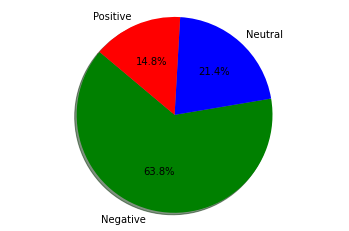

In [30]:
#Categorize Polarity into Positive, Neutral or Negative
labels = ["Negative", "Neutral", "Positive"]
#Initialize count array
values =[0,0,0]

#Categorize each sentence
for lines in Sdata:
    sentiment1 = TextBlob(lines)
    
    #Custom formula to convert polarity 
    # 0 = (Negative) 1 = (Neutral) 2=(Positive)
    polarity = round(( sentiment1.polarity + 1 ) * 3 ) % 3
    
    #add the summary array
    values[polarity] = values[polarity] + 1
print("Final summarized counts :", values)

import matplotlib.pyplot as plt
#Set colors by label
colors=["Green","Blue","Red"]

print("\n Pie Representation \n-------------------")
#Plot a pie chart
plt.pie(values, labels=labels, colors=colors, \
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()
    

In [ ]:
import pandas as pd


**Location Analysis**

The next step is to conduct the sentiment analysis for each individual location speech. 

In [ ]:
#reading in individual speech data
batdata=open("BattleCreekDec19_2019.txt").read()
bemdata=open("BemidjiSep18_2020.txt").read()
cha1data=open("CharlestonFeb28_2020.txt").read()
cha2data=open("CharlotteMar2_2020.txt").read()
cindata=open("CincinnatiAug1_2019.txt").read()
coldata=open("ColoradorSpringsFeb20_2020.txt").read()
daldata=open("DallasOct17_2019.txt").read()
desdata=open("DesMoinesJan30_2020.txt").read()
fay1data=open("FayettevilleSep19_2020.txt").read()
fay2data=open("FayettevilleSep9_2019.txt").read()
freedata=open("FreelandSep10_2020.txt").read()
greendata=open("GreenvilleJul17_2019.txt").read()
hendata=open("HendersonSep13_2020.txt").read()
herdata=open("HersheyDec10_2019.txt").read()
lasdata=open("LasVegasFeb21_2020.txt").read()
latdata=open("LatrobeSep3_2020.txt").read()
lexdata=open("LexingtonNov4_2019.txt").read()
mildata=open("MilwaukeeJan14_2020.txt").read()
minddata=open("MindenSep12_2020.txt").read()
mindata=open("MinneapolisOct10_2019.txt").read()
mosdata=open("MosineeSep17_2020.txt").read()
ndata=open("NewHampshireAug15_2019.txt").read()
nedata=open("NewHampshireAug28_2020.txt").read()
newdata=open("NewMexicoSep16_2019.txt").read()
ohdata=open("OhioSep21_2020.txt").read()
phdata=open("PhoenixFeb19_2020.txt").read()
pitdata=open("PittsburghSep22_2020.txt").read()
texdata=open("TexasSep23_2019.txt").read()
toldata=open("ToledoJan9_2020.txt").read()
tuldata=open("TulsaJun20_2020.txt").read()
tupdata=open("TupeloNov1_2019.txt").read()
wdata=open("WildwoodJan28_2020.txt").read()
widata=open("Winston-SalemSep8_2020.txt").read()
yudata=open("YumaAug18_2020.txt").read()

In [ ]:
#finding sentiments for individual location speech
BCsent=TextBlob(batdata)
BEsent=TextBlob(bemdata)
CHsent=TextBlob(cha1data)
Csent=TextBlob(cha2data)
CIsent=TextBlob(cindata)
COsent=TextBlob(coldata)
DAsent=TextBlob(daldata)
DEsent=TextBlob(desdata)
FAsent=TextBlob(fay1data)
FAYsent=TextBlob(fay2data)
FRsent=TextBlob(freedata)
GRsent=TextBlob(greendata)
HENsent=TextBlob(hendata)
HERsent=TextBlob(herdata)
LAsent=TextBlob(lasdata)
LATsent=TextBlob(latdata)
LEXsent=TextBlob(lexdata)
MILsent=TextBlob(mildata)
MINsent=TextBlob(minddata)
MIsent=TextBlob(mindata)
MOsent=TextBlob(mosdata)
Nsent=TextBlob(ndata)
NEsent=TextBlob(nedata)
NEWsent=TextBlob(newdata)
OHsent=TextBlob(ohdata)
PHsent=TextBlob(phdata)
PIsent=TextBlob(pitdata)
TEsent=TextBlob(texdata)
TOsent=TextBlob(toldata)
TUsent=TextBlob(tuldata)
TUPsent=TextBlob(tupdata)
Wsent=TextBlob(wdata)
WIsent=TextBlob(widata)
YUsent=TextBlob(yudata)



print ("BattleCreek_sentiment =", BCsent.sentiment)
print ("Bamidji_sentiment =", BEsent.sentiment)
print("Charleston_sentiment=", CHsent.sentiment)
print("Charlotte_sentiment=", Csent.sentiment)
print("Cincinnati_sentiment=", CIsent.sentiment)
print("Colorador_sentiment=", COsent.sentiment)
print("Fayetteville_sentiment=", FAsent.sentiment)
print("Fayetteville2019_sentiment=", FAYsent.sentiment)
print("Freeland_sentiment=", FRsent.sentiment)
print("Greenville_sentiment=", GRsent.sentiment)
print("Henderson_sentiment=", HENsent.sentiment)
print("Hershey_sentiment=", HERsent.sentiment)
print("Lasvegas_sentiment=", LAsent.sentiment)
print("Latrobe_sentiment=", LATsent.sentiment)
print("Lexington_sentiment=", LEXsent.sentiment)
print("Milwaukee_sentiment=", MILsent.sentiment)
print("Minden_sentiment=", MINsent.sentiment)
print("Minneapolis_sentiment=", MIsent.sentiment)
print("Mosinee_sentiment=", MOsent.sentiment)
print("NewHampshire_sentiment=", Nsent.sentiment)
print("NewHampshire2020_sentiment=", NEsent.sentiment)
print("NewMexico=", NEWsent.sentiment)
print("Ohio_sentiment=", OHsent.sentiment)
print("Phoenix_sentiment=", PHsent.sentiment)
print("Pittsburgh_sentiment=", PIsent.sentiment)
print("Texas_sentiment=", TEsent.sentiment)
print("Toledo_sentiment=", TOsent.sentiment)
print("Tulsa_sentiment=", TUsent.sentiment)
print("Tupelo_sentiment=", TUPsent.sentiment)
print("Wildwood_sentiment=", Wsent.sentiment)
print("Winston_sentiment=", WIsent.sentiment)
print("Yuma_sentiment=", YUsent.sentiment)


BattleCreek_sentiment = Sentiment(polarity=0.16496062791259583, subjectivity=0.5303509506578232)
Bamidji_sentiment = Sentiment(polarity=0.16848337219101656, subjectivity=0.5219560028661281)
Charleston_sentiment= Sentiment(polarity=0.169116834569515, subjectivity=0.5415102809905862)
Charlotte_sentiment= Sentiment(polarity=0.18669700028356934, subjectivity=0.48625508581926974)
Cincinnati_sentiment= Sentiment(polarity=0.19467849947297405, subjectivity=0.5284992833611437)
Colorador_sentiment= Sentiment(polarity=0.19461088077285207, subjectivity=0.5146238341731295)
Fayetteville_sentiment= Sentiment(polarity=0.1878037200493907, subjectivity=0.5142387204346097)
Fayetteville2019_sentiment= Sentiment(polarity=0.20865896115896118, subjectivity=0.5281553769053768)
Freeland_sentiment= Sentiment(polarity=0.16925571602726802, subjectivity=0.4964931706224813)
Greenville_sentiment= Sentiment(polarity=0.20149336005029078, subjectivity=0.5310128584287004)
Henderson_sentiment= Sentiment(polarity=0.163406

In [ ]:
#fitting the speeches for the individual location in a dataframe and getting their associated sentiments
#Polarity ranges from +1 (positive) to -1(negative), with neutral being 0. subjectiveness of sentiments, based on how it is used. objective is 0 while subjective is 1
import pandas as pd


d={'location': ['BattleCreek', 'Bemidji','Charleston','Charlotte','Cincinnati','Colorador','Dallas','DesMoines','Fayetteville2019','Fayetteville2020','Greenville','Henderson','Hershey','LasVegas','Latrobe','Lexington','Milwaukee','Minden','Minneapolis','Mosinee','NewHapshire2019','NewHapshireAU2020','NewHapshireFEB2020','NewMexico2019','Ohio','Phoenix','Pittsburgh','Texas','Toledo','Tulsa','Tupelo','Wildwood','Winston','Yuma'],'speeches': [batdata, bemdata, cha1data, cha2data, cindata, coldata, daldata, desdata, fay1data,fay2data, freedata, greendata, hendata, herdata, lasdata, latdata, lexdata, mildata, minddata, mindata,mosdata,ndata, nedata, newdata, ohdata, phdata, pitdata, texdata, toldata, tuldata, tupdata, wdata, widata,yudata], 'sentiments': [BCsent.sentiment,BEsent.sentiment,CHsent.sentiment,Csent.sentiment,CIsent.sentiment,COsent.sentiment,DAsent.sentiment,DEsent.sentiment,FAsent.sentiment,FAYsent.sentiment,FRsent.sentiment,GRsent.sentiment,HENsent.sentiment,HERsent.sentiment,LAsent.sentiment,LATsent.sentiment,LEXsent.sentiment,MILsent.sentiment,MINsent.sentiment,MIsent.sentiment,MOsent.sentiment,Nsent.sentiment,NEsent.sentiment,NEWsent.sentiment,OHsent.sentiment,PHsent.sentiment,PIsent.sentiment,TEsent.sentiment,TOsent.sentiment,TUsent.sentiment,TUPsent.sentiment,Wsent.sentiment,WIsent.sentiment,YUsent.sentiment]}
df=pd.DataFrame(data=d)


df

location  ...                                  sentiments
0          BattleCreek  ...   (0.16496062791259583, 0.5303509506578232)
1              Bemidji  ...   (0.16848337219101656, 0.5219560028661281)
2           Charleston  ...     (0.169116834569515, 0.5415102809905862)
3            Charlotte  ...  (0.18669700028356934, 0.48625508581926974)
4           Cincinnati  ...   (0.19467849947297405, 0.5284992833611437)
5            Colorador  ...   (0.19461088077285207, 0.5146238341731295)
6               Dallas  ...    (0.1490747915114336, 0.5529522712416055)
7            DesMoines  ...   (0.16208819418533274, 0.5323321560531943)
8     Fayetteville2019  ...    (0.1878037200493907, 0.5142387204346097)
9     Fayetteville2020  ...   (0.20865896115896118, 0.5281553769053768)
10          Greenville  ...   (0.16925571602726802, 0.4964931706224813)
11           Henderson  ...   (0.20149336005029078, 0.5310128584287004)
12             Hershey  ...  (0.16340608033054094, 0.48612547191683847)
13            LasVegas  ...     (0.1323187632562634, 0.548706774644274)
14             Latrobe  ...   (0.16628608818082466, 0.5454855232486823)
15           Lexington  ...    (0.1468122342700995, 0.5144324142357853)
16           Milwaukee  ...   (0.17649337104280802, 0.5342154153731125)
17              Minden  ...   (0.17371054241802567, 0.5294384810201131)
18         Minneapolis  ...   (0.09495565978577727, 0.5021635760771669)
19             Mosinee  ...   (0.19262375109597346, 0.5556670703892924)
20     NewHapshire2019  ...   (0.13910091055534984, 0.5144967625399879)
21   NewHapshireAU2020  ...   (0.21594357017312985, 0.5491620989655582)
22  NewHapshireFEB2020  ...  (0.14451569041383894, 0.47196637895711946)
23       NewMexico2019  ...   (0.19382013274011367, 0.5036158832944211)
24                Ohio  ...    (0.1591973882121095, 0.5005437603603929)
25             Phoenix  ...      (0.183453497772408, 0.520273851563915)
26          Pittsburgh  ...   (0.15865978301021466, 0.5093020258744132)
27               Texas  ...    (0.2612123054250713, 0.5115721654232291)
28              Toledo  ...   (0.18318776817456853, 0.5101346576689763)
29               Tulsa  ...   (0.14673093186632832, 0.4962009637686615)
30              Tupelo  ...   (0.15076922928438996, 0.5547737501631672)
31            Wildwood  ...   (0.18225999450891858, 0.5031649181362242)
32             Winston  ...     (0.1613437518787665, 0.491421906529644)
33                Yuma  ...   (0.15081485977790327, 0.4908828972959403)

[34 rows x 3 columns]

In [33]:
#saving the dataframe to a file
df.to_csv(index=False)
dffile=df.to_csv(index=False)

**Preparing the data for Machine Learning Model**


Since our goal is to do develop a machine learning model for political speeches, we will now preceed to remove stopwords, remove punctuations, tokenize the data and create n grams.

In [36]:
#Removing punctuations from the speech data
import string
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

df['speeches_nopunc'] = df['speeches'].apply(lambda x: remove_punct(x))

df.head()


location  ...                                    speeches_nopunc
0  BattleCreek  ...  Thank you Thank you Thank you to Vice Presiden...
1      Bemidji  ...  Theres a lot of people Thats great Thank you v...
2   Charleston  ...  Thank you Thank you Thank you All I can say is...
3    Charlotte  ...  I want to thank you very much North Carolina t...
4   Cincinnati  ...  Thank you all Thank you very much Thank you to...

[5 rows x 4 columns]

In [37]:
#tokenize the data 
import re

def tokenize(text):
    tokens = re.split('\W+', text)
    return tokens

df['speech_tokenized'] = df['speeches_nopunc'].apply(lambda x: tokenize(x.lower()))

df.head()

location  ...                                   speech_tokenized
0  BattleCreek  ...  [thank, you, thank, you, thank, you, to, vice,...
1      Bemidji  ...  [theres, a, lot, of, people, thats, great, tha...
2   Charleston  ...  [thank, you, thank, you, thank, you, all, i, c...
3    Charlotte  ...  [i, want, to, thank, you, very, much, north, c...
4   Cincinnati  ...  [thank, you, all, thank, you, very, much, than...

[5 rows x 5 columns]

In [41]:
#removing stopwords. To remove stopwords, we need to tell python what stopwords are
import nltk

stopword = nltk.corpus.stopwords.words('english')


def remove_stopwords(speech_tokenized):
    text = [word for word in speech_tokenized if word not in stopword]
    return text

df['speech_nostop'] = df['speech_tokenized'].apply(lambda x: remove_stopwords(x))

df.head()

location  ...                                      speech_nostop
0  BattleCreek  ...  [thank, thank, thank, vice, president, pence, ...
1      Bemidji  ...  [theres, lot, people, thats, great, thank, muc...
2   Charleston  ...  [thank, thank, thank, say, fake, news, doesnt,...
3    Charlotte  ...  [want, thank, much, north, carolina, thank, mu...
4   Cincinnati  ...  [thank, thank, much, thank, vice, president, m...

[5 rows x 6 columns]

**N-Grams**


The next step is to build N-grams. N-grams is a sequence of the number of items (n) in a sample of text. The sequence can be made of any number. Depending on N, it's called bigrams, trigrams, four-grams, etc. N-grams are used for building predictive text systems that predict the next sequence of words.
